In [ ]:
#테스트 데이터중 아예 드랍한 값들이 있다보니 섭미션 데이터와 행수가 틀려지는 문제 발생.
#테스트중에는 드랍은 없는걸로.

In [1]:
!pip install --ignore-installed --upgrade tensorflow==1.15

  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached protobuf-3.20.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.44.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached wrapt-1.14.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (75 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [51]:
test = pd.read_csv('/content/test.csv')

In [ ]:
#나이 컷으로 범주화
#워크 클래스(일 유형) 개수가 범주화할 정도면 각 항목별 평균인컴순으로 오른차순해서 범주화하기
#주당 근무시간 범주화
#교육 수준과 교육수준 번호가 오름차순 관계인지 확인, 아니면 오름차순으로 정렬
#결혼 상태별 평균 소득 계산 후 오름차순으로 범주화
#직업 범주화 할만한 개수면 평균소득에대해 오름차순 범주화
#가족관계 범주화 할만한 개수면 평균소득에대해 오름차순 범주화
#인종 범주화
#성별 범주화
#자본이익, 자본손실 데이터 구조 더 탐구해보기
#본 국적 평균소득에대해 오름차순으로 범주화

In [4]:
train.isnull().sum()

id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

In [5]:
test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

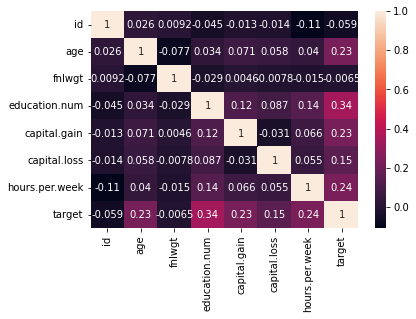

In [9]:
sns.heatmap(train.corr(), annot = True)
#fnlwgt는 뭔지도 모르겠고 target과 연관성도 낮으니 사용안함

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


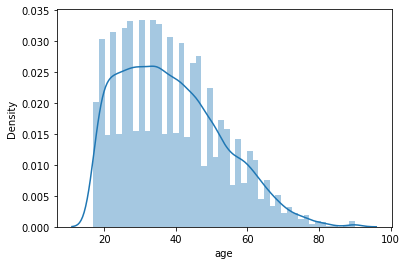

In [13]:
#나이 컷으로 범주화
sns.distplot(train['age'])

In [14]:
train['age'].min()

17

In [15]:
minage = train['age'] == 17
minage.sum()

223

In [7]:
train['Age_band'] = 0

In [8]:
train.loc[train['age'] <= 26, 'Age_band'] = 0
train.loc[(train['age'] > 26) & (train['age'] <= 36), 'Age_band'] = 1
train.loc[(train['age'] > 36) & (train['age'] <= 46), 'Age_band'] = 2
train.loc[(train['age'] > 46) & (train['age'] <= 56), 'Age_band'] = 3
train.loc[train['age'] > 56, 'Age_band'] = 4

In [9]:
train.Age_band.value_counts()

1    4549
2    4029
0    3993
3    2704
4    2205
Name: Age_band, dtype: int64

In [19]:
#워크 클래스(일 유형) 개수가 범주화할 정도면 각 항목별 평균인컴순으로 오른차순해서 범주화하기
#Never-worked, Without-pay는 무조건 target=0이 되도록 하고 나머지는 target평균별로 범주화
#하고싶지만 그렇게되면 변수가 너무 많으므로
#(Self-emp-inc), (Never-worked, Without-pay), (나머지) 3개로 인코딩해보기
#그리고 결측치는 평균내서 가장 가까운 레이블로 레이블링해주기
#개선 : 결측치평균 보니까 (나머지)랑 (무급들) 사이인데 이거 (무급들)로 넣을까? 아 모르겠네 너무 애매함 걍 없애보자
#추가 개선 : Self-emp-inc 원 핫 인코딩 해보기
#추가 가선 : 원래대로에 추가로 (나머지)부분에서 Federal-gov만 추가 레이블링 해주기
train.workclass.value_counts()

Private             11568
Self-emp-not-inc     1272
Local-gov            1053
State-gov             659
Self-emp-inc          594
Federal-gov           485
Never-worked            7
Without-pay             6
Name: workclass, dtype: int64

In [10]:
train['workclass'].fillna('nonn', inplace=True)
train.workclass.value_counts()

Private             11568
nonn                 1836
Self-emp-not-inc     1272
Local-gov            1053
State-gov             659
Self-emp-inc          594
Federal-gov           485
Never-worked            7
Without-pay             6
Name: workclass, dtype: int64

In [11]:
train.groupby(['workclass'])['target'].mean()

workclass
Federal-gov         0.377320
Local-gov           0.301045
Never-worked        0.000000
Private             0.218880
Self-emp-inc        0.543771
Self-emp-not-inc    0.293239
State-gov           0.283763
Without-pay         0.000000
nonn                0.104031
Name: target, dtype: float64

In [12]:
train['wc_band'] = 0

In [13]:
train.loc[(train['workclass'] == 'Never-worked') | (train['workclass'] == 'Without-pay'), 'wc_band'] = 0
train.loc[(train['workclass'] == 'Federal-gov') | (train['workclass'] == 'State-gov') | (train['workclass'] == 'Local-gov') | (train['workclass'] == 'Private') | (train['workclass'] == 'Self-emp-not-inc') | (train['workclass'] == 'nonn'), 'wc_band'] = 1
train.loc[train['workclass'] == 'Self-emp-inc', 'wc_band'] = 2

In [14]:
train.wc_band.value_counts()

1    16873
2      594
0       13
Name: wc_band, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


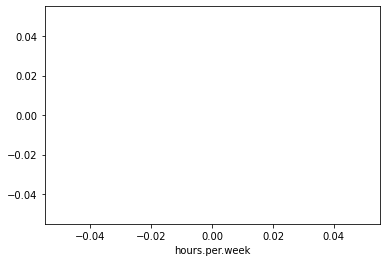

In [33]:
#주당 근무시간 범주화
#주당 근무시간에 이상치가 있을것같다
#10 아래, 60 위 자르고 10단위로 라벨링함
sns.scatterplot(train['hours.per.week'])

In [38]:
train['hours.per.week'].value_counts().tail(30)

49    10
23    10
57    10
63     9
51     8
66     7
19     7
64     6
85     6
11     6
98     6
78     5
68     5
31     3
29     3
73     2
91     2
96     2
67     1
76     1
74     1
61     1
88     1
82     1
94     1
92     1
97     1
87     1
81     1
59     1
Name: hours.per.week, dtype: int64

In [39]:
train['hours.per.week'].value_counts().head(30)

40    8142
50    1436
45     936
60     766
35     739
20     697
30     664
25     379
55     358
48     254
38     236
15     222
10     167
70     161
24     152
32     135
65     127
42     124
16     118
36     112
44     110
12     110
8       88
43      81
80      75
37      74
52      65
56      59
99      47
28      44
Name: hours.per.week, dtype: int64

In [15]:
train=train.drop(train[(train['hours.per.week']>60) | (train['hours.per.week']<10)].index)

In [16]:
train['hpw_band'] = 0
train.loc[(train['hours.per.week'] >= 10) & (train['hours.per.week'] <20), 'hpw_band'] = 0
train.loc[(train['hours.per.week'] >= 20) & (train['hours.per.week'] <30), 'hpw_band'] = 1
train.loc[(train['hours.per.week'] >= 30) & (train['hours.per.week'] <40), 'hpw_band'] = 2
train.loc[(train['hours.per.week'] >= 40) & (train['hours.per.week'] <50), 'hpw_band'] = 3
train.loc[(train['hours.per.week'] >= 50) & (train['hours.per.week'] <=60), 'hpw_band'] = 4

In [45]:
#교육 수준과 교육수준 번호가 오름차순 관계인지 확인, 아니면 오름차순으로 정렬
#오름차순 관계 맞는듯하다. 13~ : 학사~박사, 9~ : 고졸~전문대, 1:유치원, 2~8 : 1~12학년
#유치~9학년, 10학년~12학년, 고~전문, 학~박으로 4개 라벨링 ㄱㄱ
train['education'].value_counts()

HS-grad         5305
Some-college    3720
Bachelors       2697
Masters          861
Assoc-voc        691
11th             620
Assoc-acdm       554
10th             480
7th-8th          345
9th              279
Prof-school      275
12th             242
5th-6th          190
Doctorate        184
1st-4th           93
Preschool         30
Name: education, dtype: int64

In [47]:
train['education'].nunique()

16

In [17]:
train['edu_band']=0

In [18]:
train.loc[train['education.num'] < 6, 'edu_band'] = 0
train.loc[(train['education.num'] >= 6) & (train['education.num'] <9), 'edu_band'] = 1
train.loc[(train['education.num'] >= 9) & (train['education.num'] <13), 'edu_band'] = 2
train.loc[train['education.num'] >= 13, 'edu_band'] = 3

In [52]:
#결혼 상태별 평균 소득 계산 후 오름차순으로 범주화
#이거 안쓸게용^^
train['marital.status'].value_counts()

Married-civ-spouse       7517
Never-married            5532
Divorced                 2224
Widowed                   528
Separated                 520
Married-spouse-absent     233
Married-AF-spouse          12
Name: marital.status, dtype: int64

In [58]:
train.groupby(['marital.status'])['target'].mean()

marital.status
Divorced                 0.104766
Married-AF-spouse        0.416667
Married-civ-spouse       0.437409
Married-spouse-absent    0.068670
Never-married            0.043384
Separated                0.061538
Widowed                  0.081439
Name: target, dtype: float64

In [53]:
#직업 범주화 할만한 개수면 평균소득에대해 오름차순 범주화
#안쓸게용 결측치도 있고. 아 근데 이거 정확한 지표일텐데. 왜 모델들은 입력이 다양할수록 정확도가 떨어지게 설계되고만 있을까?
train['occupation'].nunique()

14

In [57]:
train['occupation'].value_counts()

Craft-repair         2045
Exec-managerial      1998
Prof-specialty       1974
Adm-clerical         1855
Sales                1722
Other-service        1615
Machine-op-inspct    1015
Transport-moving      723
Handlers-cleaners     676
Tech-support          465
Farming-fishing       422
Protective-serv       330
Priv-house-serv        78
Armed-Forces            3
Name: occupation, dtype: int64

In [56]:
train.groupby(['occupation'])['target'].mean()

occupation
Adm-clerical         0.138544
Armed-Forces         0.000000
Craft-repair         0.227873
Exec-managerial      0.480981
Farming-fishing      0.113744
Handlers-cleaners    0.054734
Machine-op-inspct    0.126108
Other-service        0.041486
Priv-house-serv      0.000000
Prof-specialty       0.453901
Protective-serv      0.315152
Sales                0.267712
Tech-support         0.298925
Transport-moving     0.174274
Name: target, dtype: float64

In [ ]:
#지금까지 쓸 변수 : 나이, 일유형, 근무시간, 교육수준
#가족관계 범주화 할만한 개수면 평균소득에대해 오름차순 범주화
#쓸게. 근데 변수 너무 많아. 일유형뺀다.

In [54]:
train['relationship'].nunique()

6

In [55]:
train.groupby(['relationship'])['target'].mean()

relationship
Husband           0.439871
Not-in-family     0.104246
Other-relative    0.038986
Own-child         0.013274
Unmarried         0.055208
Wife              0.457944
Name: target, dtype: float64

In [19]:
train['relationship_incoding'] = 0

In [20]:
train.loc[(train['relationship'] == 'Own-child') | (train['relationship'] == 'Other-relative') | (train['relationship'] == 'Unmarried') | (train['relationship'] == 'Not-in-family'), 'relationship_incoding'] = 0
train.loc[(train['relationship'] == 'Husband') | (train['relationship'] == 'Wife'), 'relationship_incoding'] = 1

In [61]:
#인종 범주화
#안씀
train.groupby(['race'])['target'].mean()

race
Amer-Indian-Eskimo    0.149351
Asian-Pac-Islander    0.229242
Black                 0.110103
Other                 0.090909
White                 0.249875
Name: target, dtype: float64

In [62]:
#성별 범주화
#쓸게
train.groupby(['sex'])['target'].mean()

sex
Female    0.108588
Male      0.296889
Name: target, dtype: float64

In [21]:
train['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
train['sex_incoding'] = 0
train.loc[train['sex'] == 'Female', 'sex_incoding'] = 0
train.loc[train['sex'] == 'Mmale', 'sex_incoding'] = 1

In [ ]:
#자본이익, 자본손실 데이터 구조 더 탐구해보기
#둘다 안씀

In [66]:
#본 국적 평균소득에대해 오름차순으로 범주화
#안씀
train.groupby(['native.country'])['target'].mean()

native.country
Cambodia                      0.272727
Canada                        0.338983
China                         0.205128
Columbia                      0.027778
Cuba                          0.276596
Dominican-Republic            0.028571
Ecuador                       0.222222
El-Salvador                   0.120690
England                       0.318182
France                        0.230769
Germany                       0.242857
Greece                        0.333333
Guatemala                     0.000000
Haiti                         0.000000
Holand-Netherlands            0.000000
Honduras                      0.142857
Hong                          0.222222
Hungary                       0.285714
India                         0.395349
Iran                          0.625000
Ireland                       0.222222
Italy                         0.333333
Jamaica                       0.047619
Japan                         0.393939
Laos                          0.200000
Mexico    

In [ ]:
#쓸 변수 : 나이, 근무시간, 교육수준, 가족관계, 성별
#Age_band, hpw_band, edu_band, relationship_incoding, sex_incoding

In [52]:
test['Age_band'] = 0
test.loc[test['age'] <= 26, 'Age_band'] = 0
test.loc[(test['age'] > 26) & (test['age'] <= 36), 'Age_band'] = 1
test.loc[(test['age'] > 36) & (test['age'] <= 46), 'Age_band'] = 2
test.loc[(test['age'] > 46) & (test['age'] <= 56), 'Age_band'] = 3
test.loc[test['age'] > 56, 'Age_band'] = 4

In [53]:
test['hpw_band'] = 0
test.loc[test['hours.per.week'] <20, 'hpw_band'] = 0
test.loc[(test['hours.per.week'] >= 20) & (test['hours.per.week'] <30), 'hpw_band'] = 1
test.loc[(test['hours.per.week'] >= 30) & (test['hours.per.week'] <40), 'hpw_band'] = 2
test.loc[(test['hours.per.week'] >= 40) & (test['hours.per.week'] <50), 'hpw_band'] = 3
test.loc[test['hours.per.week'] >= 50, 'hpw_band'] = 4

In [54]:
test['edu_band']=0
test.loc[test['education.num'] < 6, 'edu_band'] = 0
test.loc[(test['education.num'] >= 6) & (test['education.num'] <9), 'edu_band'] = 1
test.loc[(test['education.num'] >= 9) & (test['education.num'] <13), 'edu_band'] = 2
test.loc[test['education.num'] >= 13, 'edu_band'] = 3

In [55]:
test['relationship_incoding'] = 0
test.loc[(test['relationship'] == 'Own-child') | (test['relationship'] == 'Other-relative') | (test['relationship'] == 'Unmarried') | (test['relationship'] == 'Not-in-family'), 'relationship_incoding'] = 0
test.loc[(test['relationship'] == 'Husband') | (test['relationship'] == 'Wife'), 'relationship_incoding'] = 1

In [56]:
test['sex_incoding'] = 0
test.loc[test['sex'] == 'Female', 'sex_incoding'] = 0
test.loc[test['sex'] == 'Mmale', 'sex_incoding'] = 1

In [57]:
#입력 변수
X_train = train[['Age_band', 'hpw_band', 'edu_band', 'relationship_incoding', 'sex_incoding']]
#목적 변수
Y_train = train['target']
#예측 대상 데이터 셋
X_test  = test[['Age_band', 'hpw_band', 'edu_band', 'relationship_incoding', 'sex_incoding']]

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.29

In [60]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.67

In [61]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.6

In [62]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

81.24

In [63]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.66

In [64]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

82.29


In [65]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

82.61

In [66]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.07

In [67]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.07

In [68]:
#정리
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.07
8,Decision Tree,83.07
0,Support Vector Machines,82.67
6,Stochastic Gradient Decent,82.61
2,Logistic Regression,82.29
7,Linear SVC,82.29
4,Naive Bayes,81.24
1,KNN,80.60
5,Perceptron,78.66


In [69]:
Y_pred.shape

(15081,)

In [70]:
submission = pd.read_csv('/content/sample_submission.csv')

In [71]:
submission.shape

(15081, 2)

In [50]:
train.shape

(16566, 22)

In [72]:
submissionv['target'] = Y_pred

In [73]:
submissionv.to_csv('sub.csv',index=False)

In [44]:
test.shape

(14427, 20)